# AI Project 01
### Version 03
####Settings 000

use all data and average together


lr = 0.01

dataset: includes basic statics from original data


Kaggle
CareerCon 2019 - Help Navigate Robots

[Online Here](https://www.kaggle.com/c/career-con-2019/overview)


# Import Libraries

In [0]:
# Standard libraries
import pandas as pd  # for data manipulation
import numpy as np  # for better array operations 
import matplotlib.pyplot as plt  # plotting utilities 
import seaborn as sns  # for plotting data
from sklearn import preprocessing
import gc
# import scipy as sc 
import torch

In [0]:
# settings
pd.options.display.max_rows = 15
pd.options.display.max_columns = 999

# Load Data

In [0]:
# ready data from static url 
train_y = pd.read_csv('https://obj-static.s3.us-east-2.amazonaws.com/nyu/AI/Project-01/new-data/y_train_new.csv')
train_x = pd.read_csv('https://obj-static.s3.us-east-2.amazonaws.com/nyu/AI/Project-01/new-data/X_train_new.csv')
test_y = pd.read_csv('https://obj-static.s3.us-east-2.amazonaws.com/nyu/AI/Project-01/new-data/y_test_new.csv')
test_x = pd.read_csv('https://obj-static.s3.us-east-2.amazonaws.com/nyu/AI/Project-01/new-data/X_test_new.csv')

# Dataset is now stored in a Pandas Dataframe

#Verify Data Is Loaded

In [0]:
# verify data is loaded 
train_x.head()

,Unnamed: 0,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003386,0.33995,1.5064,-9.4128
2,2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [0]:
test_x.head()

,Unnamed: 0,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,485120,3790_0,3790,0,0.70992,0.68801,0.10876,0.10405,-0.87528,0.138350,0.037472,-2.4550,-0.89309,-20.6040
1,485121,3790_1,3790,1,0.70968,0.68818,0.10901,0.10429,-0.28090,0.046629,-0.225470,-9.9598,2.35790,-31.4030
2,485122,3790_2,3790,2,0.70967,0.68836,0.10872,0.10348,0.63630,0.297700,-0.063138,9.2911,-0.23731,-29.5370
3,485123,3790_3,3790,3,0.70975,0.68843,0.10819,0.10303,0.96157,0.106670,-0.127410,-12.8950,7.27000,1.6024
4,485124,3790_4,3790,4,0.70968,0.68858,0.10784,0.10289,0.28418,-0.101810,-0.140990,13.9830,8.90370,13.2140


In [0]:
train_y.head()

,Unnamed: 0,series_id,group_id,surface
0,0,0,13,fine_concrete
1,1,1,31,concrete
2,2,2,20,concrete
3,3,3,31,concrete
4,4,4,22,soft_tiles


In [0]:
test_y.head()

,Unnamed: 0,series_id,group_id,surface
0,3790,3790,59,hard_tiles_large_space
1,3791,3791,42,concrete
2,3792,3792,69,soft_pvc
3,3793,3793,55,tiled
4,3794,3794,40,hard_tiles_large_space


#Check Data For Patterns

# What are the feature distributions?
And how do they compare in the train and test set? 


# What did we learn? 

*   It looks like we can use a normal distribution in our model.
*   With the exception of orientation X and Y there is a close relationship between the training and testing data. 



# How do the distributions compare by material class? 

# What did we learn?

*    The orienation X and Y data is very noisy and may not be as useful. 
*    The linear acceleration appears to have clear and consitent variations in the max height for each materials. 
*    The angular velocity has very subtle differences from material to material. 

# Next action? 

For each series_id lets:
*    extract the angular velocity max, min, mean, average, and maybe some other stats...
*    check stats for correlation with material
*    normalize the values across all training and test data
*    save values to dataFrame
*    use values as inputs to train neural network

##Get Max, Min, Values 

In [0]:
train_x.head()

,Unnamed: 0,row_id,series_id,measurement_number,orientation_X,orientation_Y,orientation_Z,orientation_W,angular_velocity_X,angular_velocity_Y,angular_velocity_Z,linear_acceleration_X,linear_acceleration_Y,linear_acceleration_Z
0,0,0_0,0,0,-0.75853,-0.63435,-0.10488,-0.10597,0.107650,0.017561,0.000767,-0.74857,2.1030,-9.7532
1,1,0_1,0,1,-0.75853,-0.63434,-0.10490,-0.10600,0.067851,0.029939,0.003386,0.33995,1.5064,-9.4128
2,2,0_2,0,2,-0.75853,-0.63435,-0.10492,-0.10597,0.007275,0.028934,-0.005978,-0.26429,1.5922,-8.7267
3,3,0_3,0,3,-0.75852,-0.63436,-0.10495,-0.10597,-0.013053,0.019448,-0.008974,0.42684,1.0993,-10.0960
4,4,0_4,0,4,-0.75852,-0.63435,-0.10495,-0.10596,0.005135,0.007652,0.005245,-0.50969,1.4689,-10.4410


In [0]:
# train_x add new stats for groups 


def get_stats(data_x, test_data_x):
  result = pd.DataFrame()
  test_result = pd.DataFrame()

  data_x['total_lin_acc'] = (data_x['linear_acceleration_X']**2 + data_x['linear_acceleration_Y']**2 + data_x['linear_acceleration_Z']**2)**0.5
  test_data_x['total_lin_acc'] = (test_data_x['linear_acceleration_X']**2 + test_data_x['linear_acceleration_Y']**2 + test_data_x['linear_acceleration_Z']**2)**0.5

  for item in data_x.columns:
    if item in data_x.columns[:3]:
      continue
    print(item)  
  
    result[item + '_mean'] = data_x.groupby(['series_id'])[item].mean()
    result[item + '_median'] = data_x.groupby(['series_id'])[item].median()
    result[item + '_std'] = data_x.groupby(['series_id'])[item].std()
    result[item + '_min'] = data_x.groupby(['series_id'])[item].min()
    result[item + '_max'] = data_x.groupby(['series_id'])[item].max()
    result[item + '_range'] = result[item + '_max'] - result[item + '_min']

    test_result[item + '_mean'] = test_data_x.groupby(['series_id'])[item].mean()
    test_result[item + '_median'] = test_data_x.groupby(['series_id'])[item].median()
    test_result[item + '_std'] = test_data_x.groupby(['series_id'])[item].std()
    test_result[item + '_min'] = test_data_x.groupby(['series_id'])[item].min()
    test_result[item + '_max'] = test_data_x.groupby(['series_id'])[item].max()
    test_result[item + '_range'] = test_result[item + '_max'] - test_result[item + '_min']

  return result, test_result

sequence_stats, test_stats = get_stats(train_x, test_x)
test_stats.head()

measurement_number
orientation_X
orientation_Y
orientation_Z
orientation_W
angular_velocity_X
angular_velocity_Y
angular_velocity_Z
linear_acceleration_X
linear_acceleration_Y
linear_acceleration_Z
total_lin_acc


,measurement_number_mean,measurement_number_median,measurement_number_std,measurement_number_min,measurement_number_max,measurement_number_range,orientation_X_mean,orientation_X_median,orientation_X_std,orientation_X_min,orientation_X_max,orientation_X_range,orientation_Y_mean,orientation_Y_median,orientation_Y_std,orientation_Y_min,orientation_Y_max,orientation_Y_range,orientation_Z_mean,orientation_Z_median,orientation_Z_std,orientation_Z_min,orientation_Z_max,orientation_Z_range,orientation_W_mean,orientation_W_median,orientation_W_std,orientation_W_min,orientation_W_max,orientation_W_range,angular_velocity_X_mean,angular_velocity_X_median,angular_velocity_X_std,angular_velocity_X_min,angular_velocity_X_max,angular_velocity_X_range,angular_velocity_Y_mean,angular_velocity_Y_median,angular_velocity_Y_std,angular_velocity_Y_min,angular_velocity_Y_max,angular_velocity_Y_range,angular_velocity_Z_mean,angular_velocity_Z_median,angular_velocity_Z_std,angular_velocity_Z_min,angular_velocity_Z_max,angular_velocity_Z_range,linear_acceleration_X_mean,linear_acceleration_X_median,linear_acceleration_X_std,linear_acceleration_X_min,linear_acceleration_X_max,linear_acceleration_X_range,linear_acceleration_Y_mean,linear_acceleration_Y_median,linear_acceleration_Y_std,linear_acceleration_Y_min,linear_acceleration_Y_max,linear_acceleration_Y_range,linear_acceleration_Z_mean,linear_acceleration_Z_median,linear_acceleration_Z_std,linear_acceleration_Z_min,linear_acceleration_Z_max,linear_acceleration_Z_range,total_lin_acc_mean,total_lin_acc_median,total_lin_acc_std,total_lin_acc_min,total_lin_acc_max,total_lin_acc_range
series_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3790,63.5,63.5,37.094474,0,127,127,0.710416,0.710435,0.000525,0.70935,0.71142,0.00207,0.687769,0.687775,0.000523,0.68675,0.68865,0.00190,0.107808,0.107775,0.000706,0.105830,0.109680,0.003850,0.103248,0.103300,0.000550,0.101390,0.104500,0.003110,-0.002570,0.005933,0.404307,-0.87853,0.96258,1.84111,-0.000699,-0.003197,0.123289,-0.267960,0.368400,0.636360,0.003400,0.010132,0.102856,-0.225470,0.246430,0.471900,0.290920,-0.036063,4.455253,-12.89500,13.9830,26.87800,2.975297,3.11050,3.126508,-8.1074,11.2200,19.3274,-9.512869,-9.64610,9.751866,-31.711,16.6750,48.3860,13.296905,11.402018,6.836518,2.890788,33.028862,30.138074
3791,63.5,63.5,37.094474,0,127,127,0.804211,0.803990,0.000996,0.80275,0.80611,0.00336,-0.574625,-0.574055,0.001544,-0.57763,-0.57208,0.00555,-0.083750,-0.083600,0.002116,-0.089394,-0.080153,0.009241,0.126576,0.126720,0.002770,0.119800,0.132450,0.012650,0.026381,-0.000472,0.542410,-1.69460,1.70320,3.39780,-0.005137,0.007264,0.207544,-0.798100,0.632480,1.430580,0.035325,0.026245,0.154303,-0.427550,0.454590,0.882140,0.029406,0.432630,9.136620,-36.06700,33.0850,69.15200,2.302994,2.95435,23.201073,-121.4900,73.0080,194.4980,-9.383124,-9.30935,17.779225,-75.386,55.7660,131.1520,22.903142,12.192883,22.433611,3.430561,139.704969,136.274408
3792,63.5,63.5,37.094474,0,127,127,0.640428,0.640285,0.001154,0.63847,0.64262,0.00415,-0.759004,-0.758990,0.000958,-0.76053,-0.75698,0.00355,-0.083907,-0.084093,0.000660,-0.085034,-0.082573,0.002461,0.081981,0.081959,0.000532,0.081091,0.083147,0.002056,-0.001616,0.004255,0.062913,-0.16776,0.11142,0.27918,0.015782,0.015759,0.014118,-0.022201,0.053108,0.075309,-0.034910,-0.036681,0.019260,-0.082789,0.012100,0.094889,0.049342,0.063321,0.436392,-0.93724,1.0968,2.03404,2.046837,2.18395,1.630881,-1.9501,5.0369,6.9870,-9.545461,-9.47575,0.737822,-12.012,-8.0521,3.9599,9.906969,9.988305,0.729378,8.062241,12.120578,4.058337
3793,63.5,63.5,37.094474,0,127,127,-0.977197,-0.977295,0.000703,-0.97818,-0.97569,0.00249,0.151184,0.150595,0.004542,0.14477,0.15962,0.01485,0.017485,0.017457,0.000591,0.016662,0.018742,0.002080,-0.147992,-0.148035,0.000467,-0.148990,-0.147190,0.001800,0.005635,0.008498,0.084345,-0.18546,0.24806,0.43352,0.029031,0.031111,0.043922,-0.073905,0.179970,0.253875,-0.093127,-0.086524,0.037353,-0.18221

In [0]:
train_y.head()


,Unnamed: 0,series_id,group_id,surface
0,0,0,13,fine_concrete
1,1,1,31,concrete
2,2,2,20,concrete
3,3,3,31,concrete
4,4,4,22,soft_tiles


In [0]:
def get_material_stats(data_x,data_y):
  result = pd.DataFrame()

  temp_join = data_x.merge(data_y, on='series_id', how='inner')
  
  classes = (data_y['surface'].value_counts()).index

  for item in classes:
    print(item)
    # result['surface'] = item
    # result['group_id'] = data_y.groupby(['surface'])['surface'==item,1]
    # print('surface type {} has group_id {}'.format(item, result['group_id']))
    for feature in data_x.columns:
      result[feature + '_mat_mean'] = temp_join.groupby(['surface'])[feature].mean()
      result[feature + '_mat_median'] = temp_join.groupby(['surface'])[feature].mean()
      result[feature + '_mat_std'] = temp_join.groupby(['surface'])[feature].std()
      result[feature + '_mat_min'] = temp_join.groupby(['surface'])[feature].min()
      result[feature + '_mat_max'] = temp_join.groupby(['surface'])[feature].max()
      result[feature + '_mat_range'] = result[feature + '_mat_max'] - result[feature + '_mat_min']
  return result


mat_stats = get_material_stats(sequence_stats,train_y)
mat_stats.head(10)
# mat_stats.shape()
# print(get_material_stats(get_stats(train_x),train_y))

concrete
soft_pvc
wood
tiled
fine_concrete
hard_tiles_large_space
soft_tiles
carpet
hard_tiles


,measurement_number_mean_mat_mean,measurement_number_mean_mat_median,measurement_number_mean_mat_std,measurement_number_mean_mat_min,measurement_number_mean_mat_max,measurement_number_mean_mat_range,measurement_number_median_mat_mean,measurement_number_median_mat_median,measurement_number_median_mat_std,measurement_number_median_mat_min,measurement_number_median_mat_max,measurement_number_median_mat_range,measurement_number_std_mat_mean,measurement_number_std_mat_median,measurement_number_std_mat_std,measurement_number_std_mat_min,measurement_number_std_mat_max,measurement_number_std_mat_range,measurement_number_min_mat_mean,measurement_number_min_mat_median,measurement_number_min_mat_std,measurement_number_min_mat_min,measurement_number_min_mat_max,measurement_number_min_mat_range,measurement_number_max_mat_mean,measurement_number_max_mat_median,measurement_number_max_mat_std,measurement_number_max_mat_min,measurement_number_max_mat_max,measurement_number_max_mat_range,measurement_number_range_mat_mean,measurement_number_range_mat_median,measurement_number_range_mat_std,measurement_number_range_mat_min,measurement_number_range_mat_max,measurement_number_range_mat_range,orientation_X_mean_mat_mean,orientation_X_mean_mat_median,orientation_X_mean_mat_std,orientation_X_mean_mat_min,orientation_X_mean_mat_max,orientation_X_mean_mat_range,orientation_X_median_mat_mean,orientation_X_median_mat_median,orientation_X_median_mat_std,orientation_X_median_mat_min,orientation_X_median_mat_max,orientation_X_median_mat_range,orientation_X_std_mat_mean,orientation_X_std_mat_median,orientation_X_std_mat_std,orientation_X_std_mat_min,orientation_X_std_mat_max,orientation_X_std_mat_range,orientation_X_min_mat_mean,orientation_X_min_mat_median,orientation_X_min_mat_std,orientation_X_min_mat_min,orientation_X_min_mat_max,orientation_X_min_mat_range,orientation_X_max_mat_mean,orientation_X_max_mat_median,orientation_X_max_mat_std,orientation_X_max_mat_min,orientation_X_max_mat_max,orientation_X_max_mat_range,orientation_X_range_mat_mean,orientation_X_range_mat_median,orientation_X_range_mat_std,orientation_X_range_mat_min,orientation_X_range_mat_max,orientation_X_range_mat_range,orientation_Y_mean_mat_mean,orientation_Y_mean_mat_median,orientation_Y_mean_mat_std,orientation_Y_mean_mat_min,orientation_Y_mean_mat_max,orientation_Y_mean_mat_range,orientation_Y_median_mat_mean,orientation_Y_median_mat_median,orientation_Y_median_mat_std,orientation_Y_median_mat_min,orientation_Y_median_mat_max,orientation_Y_median_mat_range,orientation_Y_std_mat_mean,orientation_Y_std_mat_median,orientation_Y_std_mat_std,orientation_Y_std_mat_min,orientation_Y_std_mat_max,orientation_Y_std_mat_range,orientation_Y_min_mat_mean,orientation_Y_min_mat_median,orientation_Y_min_mat_std,orientation_Y_min_mat_min,orientation_Y_min_mat_max,orientation_Y_min_mat_range,orientation_Y_max_mat_mean,orientation_Y_max_mat_median,orientation_Y_max_mat_std,orientation_Y_max_mat_min,orientation_Y_max_mat_max,orientation_Y_max_mat_range,orientation_Y_range_mat_mean,orientation_Y_range_mat_median,orientation_Y_range_mat_std,orientation_Y_range_mat_min,orientation_Y_range_mat_max,orientation_Y_range_mat_range,orientation_Z_mean_mat_mean,orientation_Z_mean_mat_median,orientation_Z_mean_mat_std,orientation_Z_mean_mat_min,orientation_Z_mean_mat_max,orientation_Z_mean_mat_range,orientation_Z_median_mat_mean,orientation_Z_median_mat_median,orientation_Z_median_mat_std,orientation_Z_median_mat_min,orientation_Z_median_mat_max,orientation_Z_median_mat_range,orientation_Z_std_mat_mean,orientation_Z_std_mat_median,orientation_Z_std_mat_std,orientation_Z_std_mat_min,orientation_Z_std_mat_max,orientation_Z_std_mat_range,orientation_Z_min_mat_mean,orientation_Z_min_mat_median,orientation_Z_min_mat_std,orientation_Z_min_mat_min,orientation_Z_min_mat_max,orientation_Z_min_mat_range,orientation_Z_max_mat_mean,orientation_Z_max_mat_median,orientation_Z_max_mat_std,orientation_Z_max_mat_min,orientation_Z_m

##Scale Data for input to network

In [0]:
# from sklearn import preprocessing
# scale all values to 0.01 - 1.0 range 
# https://scikit-learn.org/stable/modules/preprocessing.html#scaling-features-to-a-range
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html#sklearn.preprocessing.MinMaxScaler

scaler = preprocessing.StandardScaler().fit(sequence_stats.values)  # get data scale fit object
scale_seq_stats = pd.DataFrame(scaler.transform(sequence_stats.values), index=sequence_stats.index, columns=sequence_stats.columns)  # scale training data and center on mean
scale_test_stats = pd.DataFrame(scaler.transform(test_stats.values), index=test_stats.index, columns=test_stats.columns)   # scale test data and center on mean (using fit to training data)

print(scale_seq_stats.shape)
print(scale_test_stats.shape)
scale_test_stats.head()

(3790, 72)
(20, 72)


,measurement_number_mean,measurement_number_median,measurement_number_std,measurement_number_min,measurement_number_max,measurement_number_range,orientation_X_mean,orientation_X_median,orientation_X_std,orientation_X_min,orientation_X_max,orientation_X_range,orientation_Y_mean,orientation_Y_median,orientation_Y_std,orientation_Y_min,orientation_Y_max,orientation_Y_range,orientation_Z_mean,orientation_Z_median,orientation_Z_std,orientation_Z_min,orientation_Z_max,orientation_Z_range,orientation_W_mean,orientation_W_median,orientation_W_std,orientation_W_min,orientation_W_max,orientation_W_range,angular_velocity_X_mean,angular_velocity_X_median,angular_velocity_X_std,angular_velocity_X_min,angular_velocity_X_max,angular_velocity_X_range,angular_velocity_Y_mean,angular_velocity_Y_median,angular_velocity_Y_std,angular_velocity_Y_min,angular_velocity_Y_max,angular_velocity_Y_range,angular_velocity_Z_mean,angular_velocity_Z_median,angular_velocity_Z_std,angular_velocity_Z_min,angular_velocity_Z_max,angular_velocity_Z_range,linear_acceleration_X_mean,linear_acceleration_X_median,linear_acceleration_X_std,linear_acceleration_X_min,linear_acceleration_X_max,linear_acceleration_X_range,linear_acceleration_Y_mean,linear_acceleration_Y_median,linear_acceleration_Y_std,linear_acceleration_Y_min,linear_acceleration_Y_max,linear_acceleration_Y_range,linear_acceleration_Z_mean,linear_acceleration_Z_median,linear_acceleration_Z_std,linear_acceleration_Z_min,linear_acceleration_Z_max,linear_acceleration_Z_range,total_lin_acc_mean,total_lin_acc_median,total_lin_acc_std,total_lin_acc_min,total_lin_acc_max,total_lin_acc_range
series_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
3790,0.0,0.0,1.0,0.0,0.0,0.0,1.061531,1.061490,-0.576085,1.070991,1.051959,-0.563901,0.868340,0.868300,-0.556786,0.875817,0.860644,-0.552461,0.902934,0.902614,-0.203432,0.899121,0.905479,0.191052,1.025331,1.025784,-0.398465,1.023594,1.021013,-0.083968,-0.262562,0.448697,4.204958,-3.146705,3.517251,3.381934,-0.132355,-0.170286,2.344714,-1.265722,1.976920,2.027272,0.102852,0.132948,1.152647,-0.393500,0.647605,1.342769,0.855175,-0.710161,2.568404,-2.644562,2.754742,2.773005,0.356860,0.675137,1.157306,-1.566783,1.216388,1.462132,-1.836384,-1.810004,4.075577,-2.774950,3.588781,3.220398,3.765628,2.221858,3.457248,-1.476659,2.607478,2.435428
3791,0.0,0.0,1.0,0.0,0.0,0.0,1.198280,1.197880,-0.501958,1.207238,1.189933,-0.504461,-0.914216,-0.913369,-0.390855,-0.908305,-0.920769,-0.378457,-0.904509,-0.903045,1.349755,-0.941838,-0.886211,1.936226,1.248922,1.250255,1.991124,1.200020,1.288853,2.931972,2.524538,-0.039068,6.054330,-7.098783,7.078499,7.193460,-0.197553,-0.016979,4.917881,-5.650742,4.186221,6.162873,0.248834,0.206494,2.332887,-1.241053,1.527156,3.572169,-0.528882,1.335265,6.564547,-9.329530,8.052998,8.910952,-2.357683,0.212067,17.462883,-27.920140,19.066347,24.849166,-0.228350,0.283643,8.368382,-10.236712,10.545756,10.541403,15.818673,3.630706,14.150647,-1.239650,18.935153,15.107110
3792,0.0,0.0,1.0,0.0,0.0,0.0,0.959492,0.959222,-0.477246,0.967595,0.951710,-0.468060,-1.174568,-1.174492,-0.486024,-1.166388,-1.182033,-0.473802,-0.905993,-0.907692,-0.253842,-0.900723,-0.909052,-0.258595,0.821492,0.821234,-0.418706,0.829066,0.816391,-0.417176,-0.170740,0.320929,-0.366723,0.295425,-0.575526,-0.442423,0.109748,0.107533,-0.989358,0.767059,-0.660821,-0.894191,-0.072325,-0.080733,-0.765132,0.204924,-0.342522,-0.706052,-0.423372,-0.276441,-0.862206,0.805173,-0.819459,-0.834197,-3.391964,-2.072587,-0.057517,-0.135650,-0.569850,-0.185436,-2.240323,-0.750901,-0.744880,0.590574,-0.811869,-0.709279,-0.487760,-0.296530,-0.729819,0.794080,-0.592711,-0.678247
3793,0.0,0.0,1.0,0.0,0.0,0.0,-1.398915,-1.398972,-0.548022,-1.390692,-1.406355,-0.544548,0.110659,0.109817,0.096832,0.111048,0.113124,0.064895,0.050688,0.050447,-0.330383,0.058268,0.047184,-0.381932,-1.382695,-1.383164,-0.488402,-1.375838,-1.390889,-0.498107,0.527314,0.644041,-0.079719,0.209707,0.081503,-0.064

## Create Neural Network Class to fit inputs and outputs

In [0]:
train_y.head()

,Unnamed: 0,series_id,group_id,surface
0,0,0,13,fine_concrete
1,1,1,31,concrete
2,2,2,20,concrete
3,3,3,31,concrete
4,4,4,22,soft_tiles


## create index values to be used to identify materials

In [0]:


material_set = set(train_y.surface.unique())

material_to_index = dict()
index_to_material = dict()
# for index, row in train_y.iterrows

# print(material_set)

i = 0 
for item in material_set:
  material_to_index[item] = i
  index_to_material[i] = item
  i += 1

# print(material_to_index) 
# print(index_to_material)

train_y_index = []
for index, row in train_y.iterrows():
  train_y_index.append(material_to_index[row['surface']])

train_y_index = np.array(train_y_index)
print((train_y_index))

test_y_index = []
for index, row in test_y.iterrows():
  test_y_index.append(material_to_index[row['surface']])

test_y_index = np.array(test_y_index)
print(test_y_index)
print(test_y_index.shape)

[5 4 4 ... 4 1 8]
[7 4 1 0 7 4 8 5 4 0 5 7 0 8 0 0 8 5 0 1]
(20,)


## Create DataSet and Data Loader

In [0]:
import numpy as np
import torch
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import Dataset, TensorDataset, DataLoader, Subset
from torch.utils.data.dataset import random_split
import torch.nn.functional as F
import math
torch.manual_seed(0)
np.random.seed(0)
torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

device = 'cuda' if torch.cuda.is_available() else 'cpu'

np.random.seed(0)
x_tensor = torch.from_numpy(scale_seq_stats.to_numpy()).float().to(device)
test_x_tensor = torch.from_numpy(scale_test_stats.to_numpy()).float().to(device)
# import pdb; pdb.set_trace()
y_tensor = torch.from_numpy(train_y_index).long().to(device)
test_y_tensor = torch.from_numpy(test_y_index).long().to(device)

dataset = TensorDataset(x_tensor, y_tensor) 
test_dataset = TensorDataset(test_x_tensor, test_y_tensor)

sub_dataset = Subset(dataset, np.arange(0,len(dataset),1))
sub_test_dataset = Subset(test_dataset, np.arange(0,len(test_dataset),1))


train_size = math.floor(len(train_y) * 0.8) 
test_size = len(train_y) - train_size

# train_dataset, val_dataset = random_split(dataset, [train_size, test_size])
# import pdb; pdb.set_trace()
size_of_batch = 100
train_loader = DataLoader(dataset=sub_dataset, batch_size=size_of_batch)
val_loader = DataLoader(dataset=sub_test_dataset, batch_size=size_of_batch)
# import pdb; pdb.set_trace()
# test_loader = DataLoader(dataset=test_dataset, batch_size=size_of_batch)







In [0]:
# Input Layer Nodes: 42 (the number of normalized statistics we have for each sequence)
# Hidden Layer 30 Nodes (arbitrary) (ReLu)
# Hidden layer 20 Nodes (arbitrary) (ReLu)
# Output Layer Nodes: 9 (9 surfaces to classify) (LogSoftmax)

class NeuralNetwork(nn.Module):
  def __init__(self):  # initialization of class
    super().__init__()  # initialize parent class
    self.fc1 = nn.Linear(72, 72)  # create initional weights for input nodes to hidden layer 1 nodes
    self.fc2 = nn.Linear(72, 40)  # create initional weights for hidden layer 1 nodes to hidden layer 2
    self.fc3 = nn.Linear(40, 40)  # create initional weights for hidden layer 1 nodes to hidden layer 2
    self.fc4 = nn.Linear(40, 9)   # create initional weights for hidden layer 2, to output nodes 

  def forward(self, x):  # define the model structure, components, and order of the different layers
    # import pdb; pdb.set_trace()
    x = x.view(x.shape[0], -1) # format input data to be a vector in the same shape as example  

    x = F.relu(self.fc1(x))
    x = F.relu(self.fc2(x))
    x = F.relu(self.fc3(x))
    x = self.fc4(x)
    x = F.log_softmax(x, dim=1)

    return x


model = NeuralNetwork().to(device)

##Train Network

In [0]:
def get_max_index(in_guess, in_target):
  resulta, resultb = np.unravel_index(np.argmax(in_guess, axis=1), in_guess.shape)
  result = np.equal(resultb,in_target)
  # take sum of result and return 
  return np.equal(resultb,in_target).astype(int).sum()
      

In [0]:
from IPython.display import HTML, display
import time

def progress(value, max=100):
    return HTML("""
        <progress
            value='{value}'
            max='{max}',
            style='width: 100%'
        >
            {value}
        </progress>
    """.format(value=value, max=max))

# out = display(progress(0, 100), display_id=True)
# for ii in range(101):
#     time.sleep(0.02)
#     out.update(progress(ii, 100))


In [0]:
from torch import optim

criterion = nn.NLLLoss()
optimizer = optim.SGD(model.parameters(), lr=0.012)

# num_epochs = 10000 # estimate: takes about an hour to run 
num_epochs = 400

losses = []
val_losses = []
train_losses = []
arr_train_loss = []
arr_train_correct = []
arr_test_loss = []
arr_test_correct = []
min_test_loss_index = 0
# print(model.state_dict())
out = display(progress(0, num_epochs - 1), display_id=True)

for i in range(num_epochs):
  out.update(progress(i, num_epochs - 1))
  cum_train_loss = 0  # keep track of total loss over epoch
  cum_test_loss = 0
  batch_num = 0 
  arr_batch_num = []
  batch_losses = []
  count_train = 0 
  arr_count_train = []
  count_val = 0
  arr_count_val = []
  training_wins = 0
  validation_wins = 0
  result_stats = []

  # loop through data in batch
  for batch, labels in train_loader:  # declare test data with data and label pairs
    batch = batch.to(device)
    labels = labels.to(device)
    model.train()
    # import pdb; pdb.set_trace()
    output = model(batch)  # run a forward pass of data through network and get prediction
    training_wins += get_max_index((output.cpu().detach().numpy()),( labels.cpu().detach().numpy()))
    loss = criterion(output, labels.squeeze())  # calculate the loss between the prediction and expected value
    loss.backward()
    optimizer.step()  # update weights of neural network using loss 
    optimizer.zero_grad()  # zero out gradients at the start of each epoch
    cum_train_loss += loss.item()
    count_train += len(labels)  # change to use specific batch size 

  with torch.no_grad():
    for x_val, y_val in val_loader:
      x_val = x_val.to(device)
      y_val = y_val.to(device)
      model.eval()
      output = model(x_val)
      # import pdb; pdb.set_trace()
      validation_wins += get_max_index((output.cpu().numpy()), (y_val.cpu().numpy()))
      loss = criterion(output, y_val.squeeze())
      cum_test_loss += loss.item()
      count_val += len(y_val) # change to use specific batch size 
  arr_train_loss.append((cum_train_loss / count_train * 100))
  # arr_train_loss.append(((count_train - training_wins)**2))
  arr_train_correct.append((training_wins / count_train * 100))
  arr_test_loss.append((cum_test_loss / count_val * 100))
  # arr_test_loss.append(((count_val - validation_wins)**2))
  arr_test_correct.append((validation_wins / count_val * 100))




Epoch with lowest test loss: 398
Number or Epochs: 400
Training Loss: 0.22991737542492102%
Test Loss: 0.6866355240345001%
Training Correct Percentage 93.03430079155672%
Test Correct Percentage 95.0%


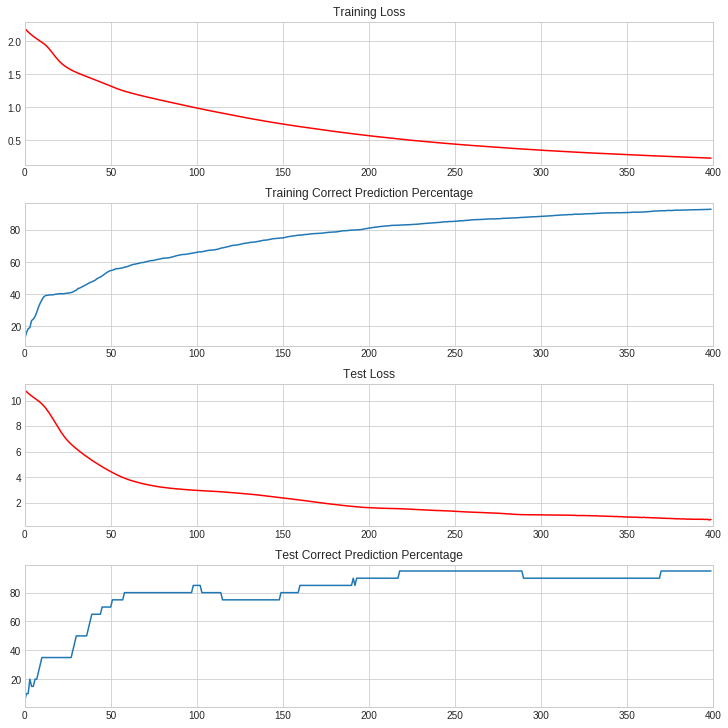

In [0]:
plt.style.use('seaborn-whitegrid')

x = np.linspace(0, num_epochs, num_epochs, endpoint=False, dtype=int)

fig, axes = plt.subplots(4, figsize=(10,10), constrained_layout=True)
axes[0].plot(x, arr_train_loss, color='r')
axes[0].set(xlim=(0, num_epochs))
axes[0].set_title('Training Loss')

axes[1].plot(x, arr_train_correct)
axes[1].set(xlim=(0, num_epochs))
axes[1].set_title('Training Correct Prediction Percentage')

axes[2].plot(x, arr_test_loss,  color='r')
axes[2].set(xlim=(0, num_epochs))
axes[2].set_title('Test Loss')

axes[3].plot(x, arr_test_correct)
axes[3].set(xlim=(0, num_epochs))
axes[3].set_title('Test Correct Prediction Percentage')

best_epoch = (np.unravel_index(np.argmin(arr_test_loss,axis=None),np.array(arr_test_loss).shape))[0]
print('Epoch with lowest test loss: {}'.format(best_epoch))
print('Number or Epochs: {}'.format(num_epochs))

print('Training Loss: {}%'.format(arr_train_loss[-1]))
print('Test Loss: {}%'.format(arr_test_loss[-1]))
print('Training Correct Percentage {}%'.format(arr_train_correct[-1]))
print('Test Correct Percentage {}%'.format(arr_test_correct[-1]))
